In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import nltk
import string
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
test = pd.read_csv("/content/drugsComTest_raw.csv")
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
train = pd.read_csv("/content/drugsComTrain_raw.csv")
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
data=pd.concat([train,test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df=data.copy()

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
# prompt: total rows and columns

df.shape


(215063, 7)

In [ ]:
df.drop('uniqueID', axis=1, inplace=True) #dropping the column uniqueID

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.isna()

,drugName,condition,review,rating,date,usefulCount
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
53761,False,False,False,False,False,False
53762,False,False,False,False,False,False
53763,False,False,False,False,False,False
53764,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
drugName,0
condition,1194
review,0
rating,0
date,0
usefulCount,0


In [ ]:
print(f"number of Drugs: {len(df['drugName'].unique())}")
print(f"number of Conditions : {len(df['condition'].unique())}")

number of Drugs: 3671
number of Conditions : 917


In [ ]:
# filling conditions null values:
df['condition'].fillna("unknown", inplace=True)

print(df.isna().sum())

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


<ipython-input-15-5f86af6e1cd1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna("unknown", inplace=True)


In [ ]:
df.isna().sum()

,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [ ]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [ ]:
num = len(df['drugName'].unique().tolist())
print('Number of Drugs are -',num )

Number of Drugs are - 3671


In [ ]:
df['drugName'].value_counts().nlargest(25)

,count
drugName,
Levonorgestrel,4930
Etonogestrel,4421
Ethinyl estradiol / norethindrone,3753
Nexplanon,2892
Ethinyl estradiol / norgestimate,2790
Ethinyl estradiol / levonorgestrel,2503
Phentermine,2085
Sertraline,1868
Escitalopram,1747


<ipython-input-21-8c8c866239f7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.index, y=top_drugs.values, palette="viridis")


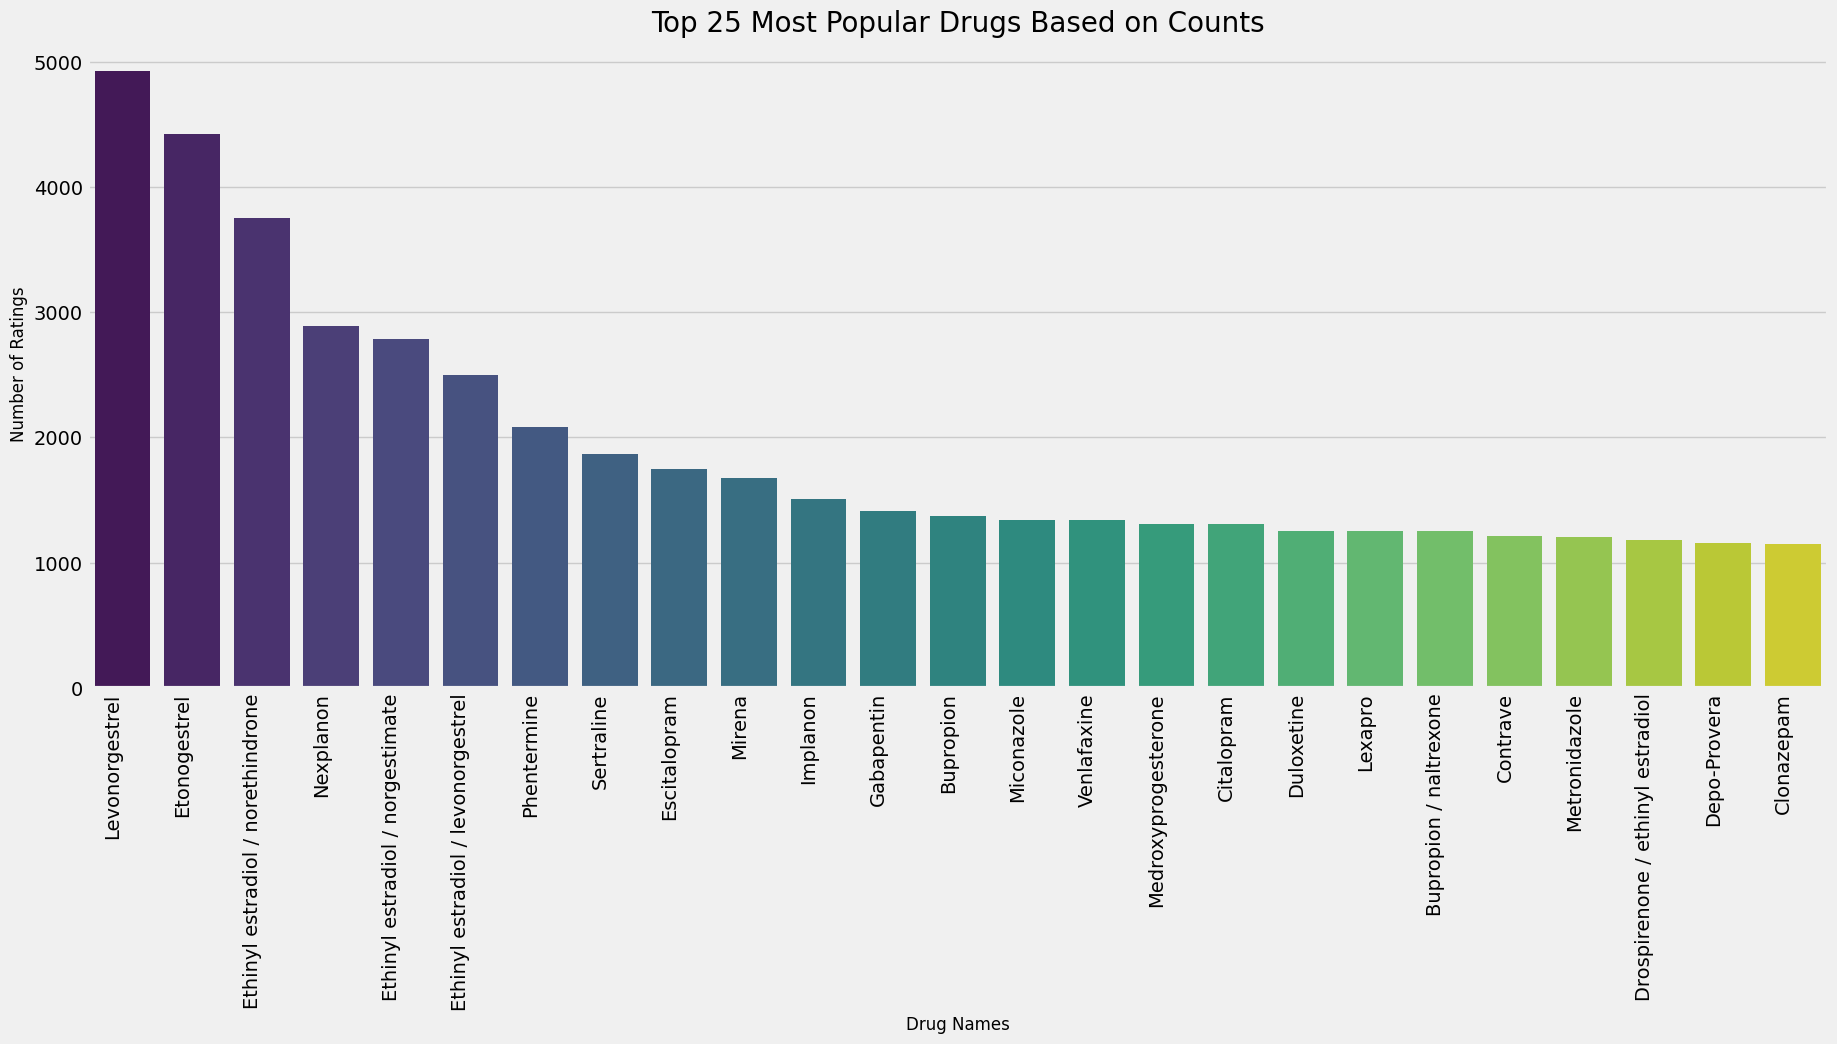

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 25 most common drugs
top_drugs = df['drugName'].value_counts().head(25)

# Set figure size
plt.figure(figsize=(20, 8))

# Create bar plot
sns.barplot(x=top_drugs.index, y=top_drugs.values, palette="viridis")

# Labels and title
plt.title("Top 25 Most Popular Drugs Based on Counts", fontsize=20)
plt.xlabel("Drug Names", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-labels for better readability

# Show the plot
plt.show()


<ipython-input-22-258d5c3bddfa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_rating = sns.barplot(x = drugname[0:25], y = drug_rating[0:25], palette = 'viridis')


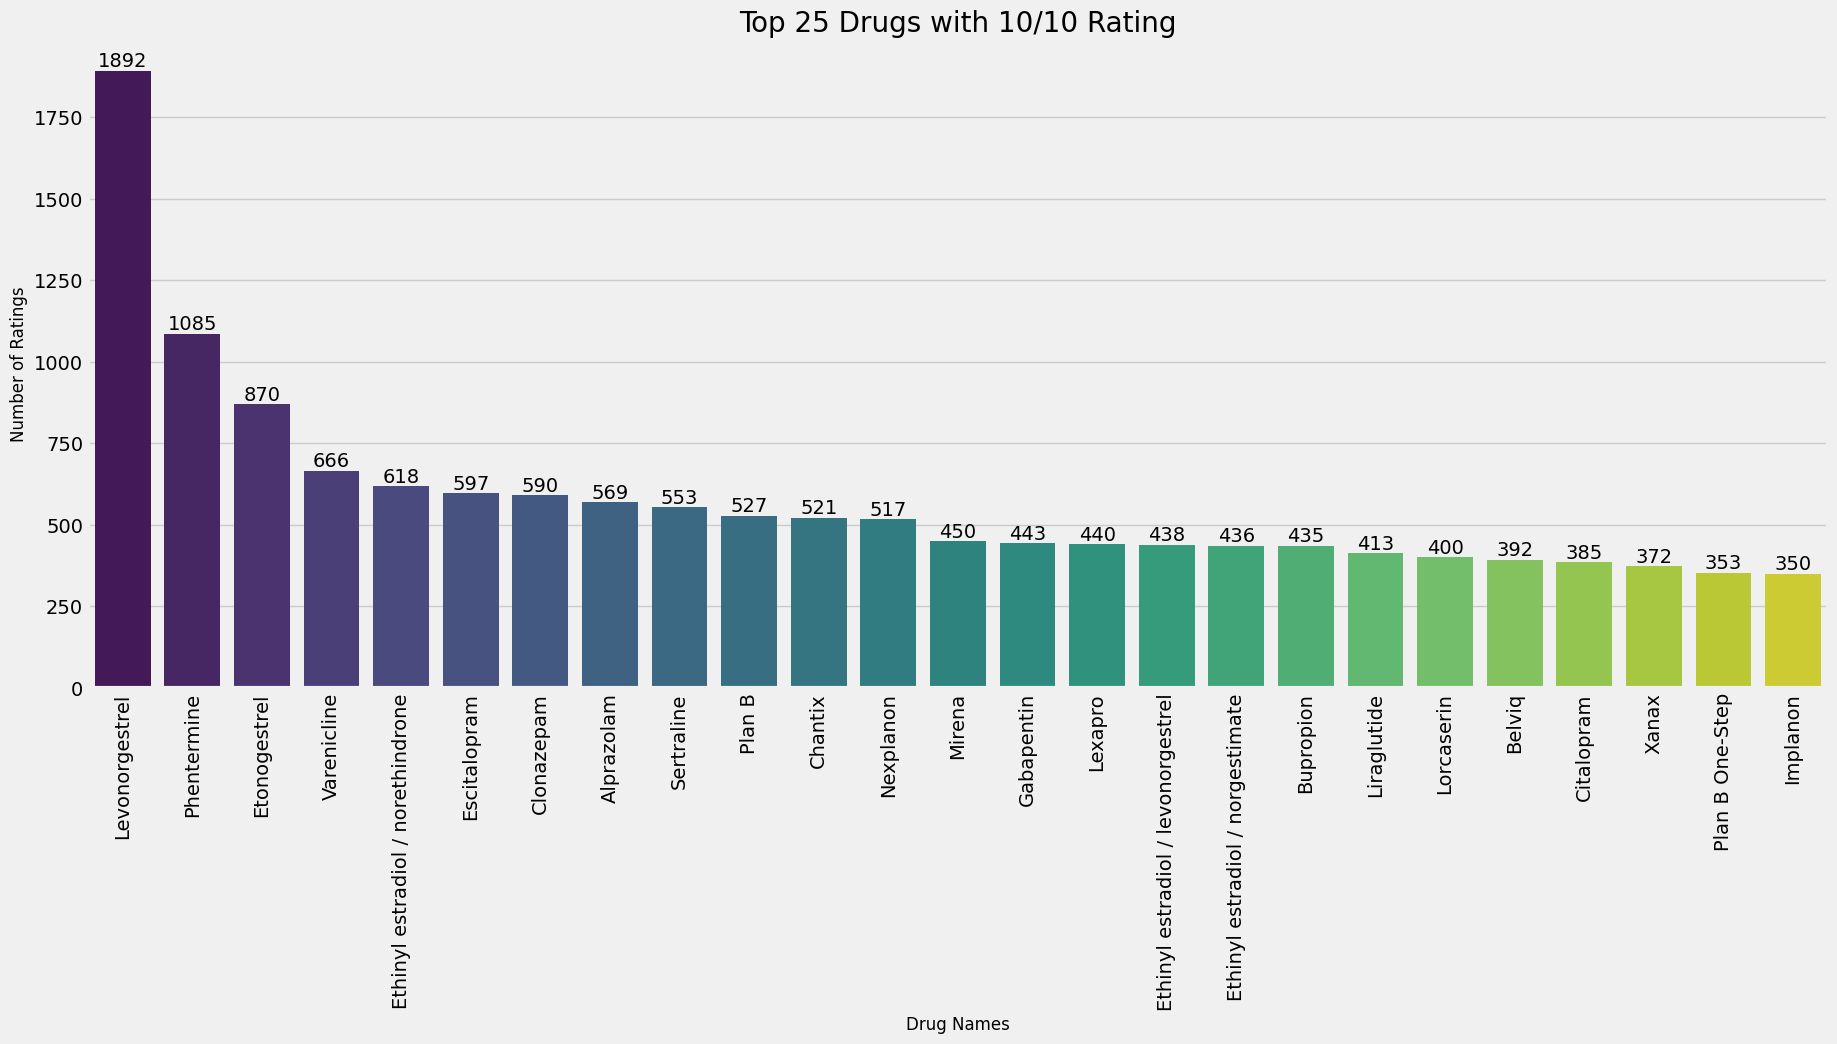

In [ ]:
plt.figure(figsize=(20, 8))
rating = dict(df.loc[df.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())
sns_rating = sns.barplot(x = drugname[0:25], y = drug_rating[0:25], palette = 'viridis')
for i in sns_rating.containers:
    sns_rating.bar_label(i,)
sns_rating.set_title('Top 25 Drugs with 10/10 Rating', fontsize=20)
sns_rating.set_ylabel("Number of Ratings",fontsize=12)
sns_rating.set_xlabel("Drug Names",fontsize=12)
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

<ipython-input-23-4f921f8d22fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'magma')


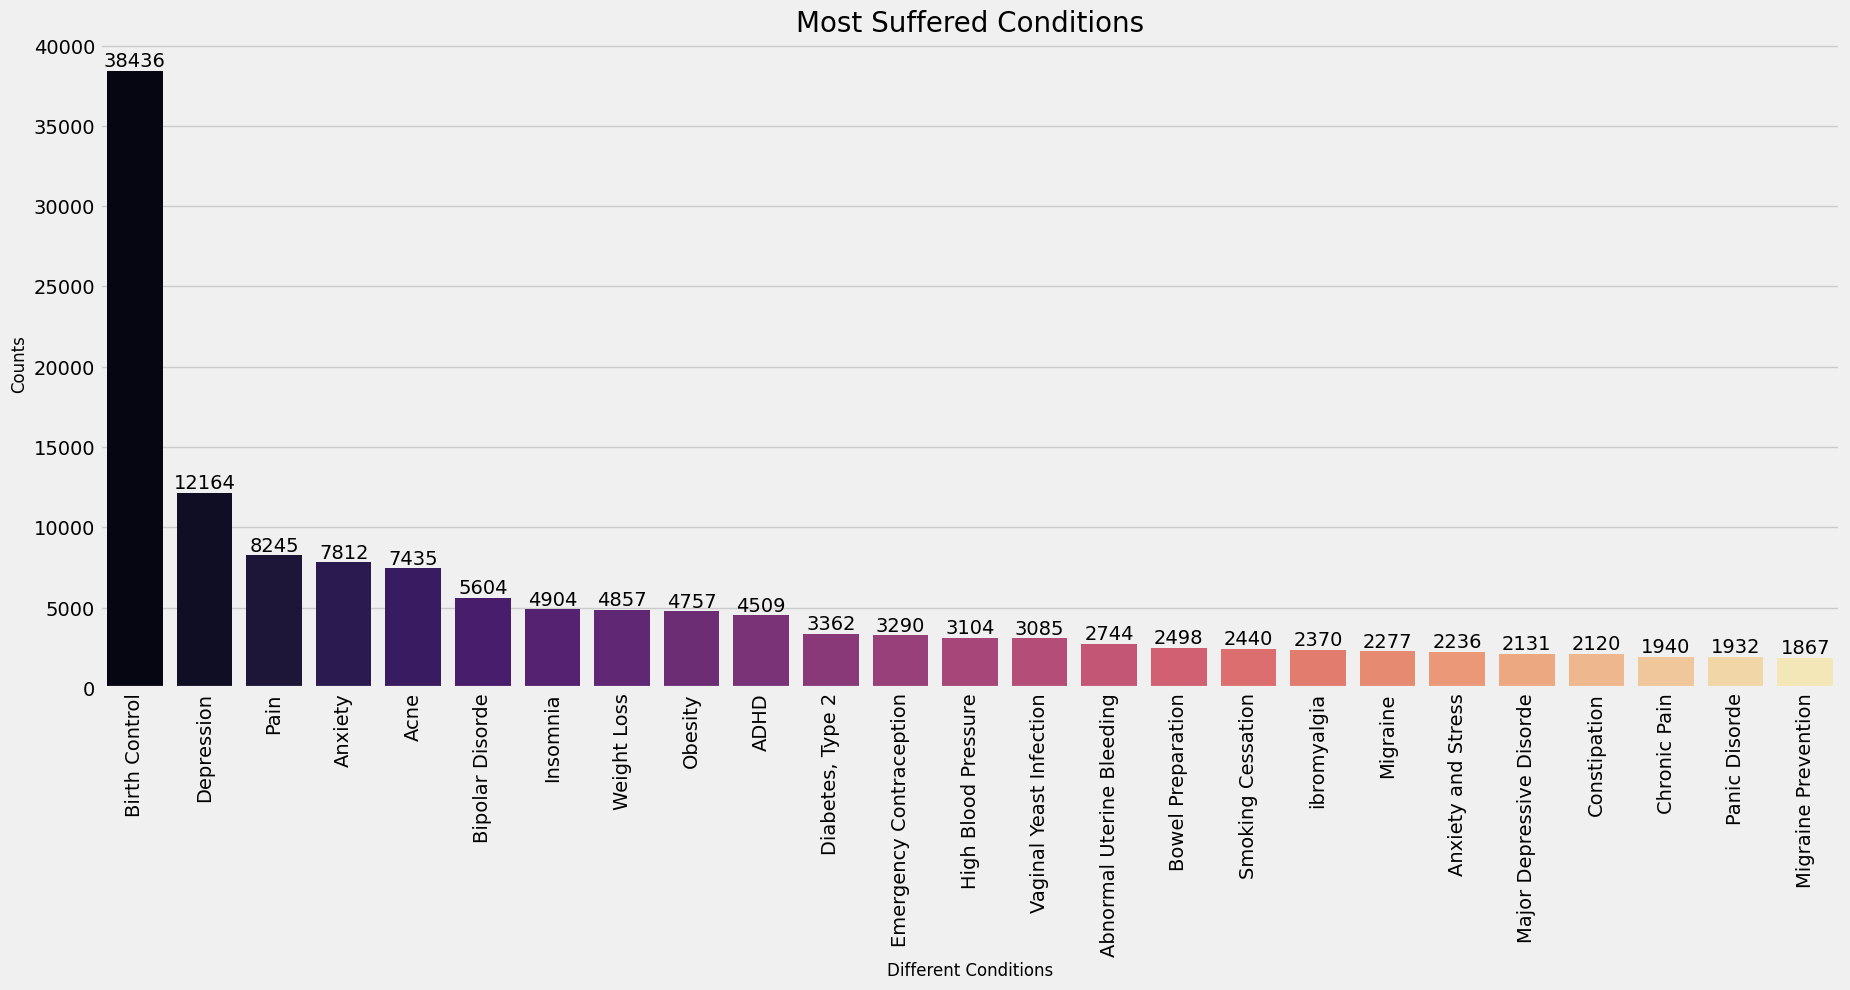

In [ ]:
common_conditions = df['condition'].value_counts().nlargest(25)
new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})
plt.figure(figsize=(20, 8))
sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'magma')
for i in sns_1.containers:
    sns_1.bar_label(i,)
sns_1.set_title('Most Suffered Conditions', fontsize=20)
sns_1.set_ylabel("Counts",fontsize=12)
sns_1.set_xlabel("Different Conditions",fontsize=12)
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

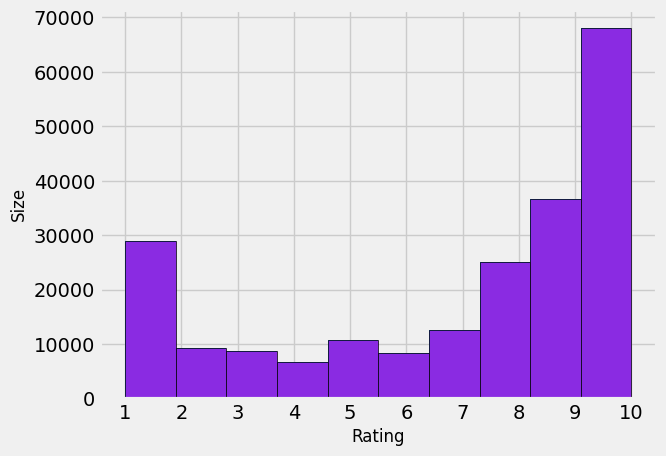

In [ ]:
#plt.figure(figsize=(20, 8))
df['rating'].hist()
plt.hist(df['rating'], bins=10, color='blueviolet', edgecolor='black')
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Size',fontsize=12)
#plt.title("Distribution of Rating By Size",fontsize=20)
plt.xticks(range(1, 10+1, 1))
plt.show()

In [ ]:
avg_rating = (df['rating'].groupby(df['drugName']).mean())
avg_rating

,rating
drugName,
A + D Cracked Skin Relief,10.000000
A / B Otic,10.000000
Abacavir / dolutegravir / lamivudine,8.414286
Abacavir / lamivudine,10.000000
Abacavir / lamivudine / zidovudine,9.000000
...,...
ZzzQuil,2.000000
depo-subQ provera 104,5.500000
ella,7.183099


In [ ]:
sorted_drugs = avg_rating.sort_values(ascending=False)
sorted_drugs


,rating
drugName,
A + D Cracked Skin Relief,10.0
Glyset,10.0
Garlic,10.0
Generlac,10.0
Gengraf,10.0
...,...
Meningococcal conjugate vaccine,1.0
Menactra,1.0
Cisapride,1.0


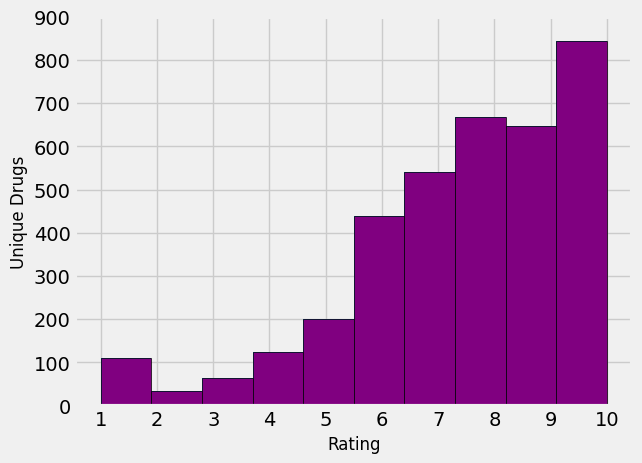

In [ ]:
#plt.figure(figsize=(20, 8))
avg_rating.hist()
plt.hist(avg_rating, bins=10, color='purple', edgecolor='black')
plt.xlabel('Rating',fontsize=12)
plt.ylabel('Unique Drugs',fontsize=12)
#plt.title("Distribution of Rating by Unique Drugs", fontsize=20)
plt.xticks(range(1, 10+1, 1))
plt.yticks(range(0, 1000, 100))
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
df['review'] = df['review'].str.lower()
df['review'] = df['review'].apply(word_tokenize)
stop_words = set(stopwords.words('english')) # You can replace 'english' with the appropriate language if needed
df['review'] = df['review'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


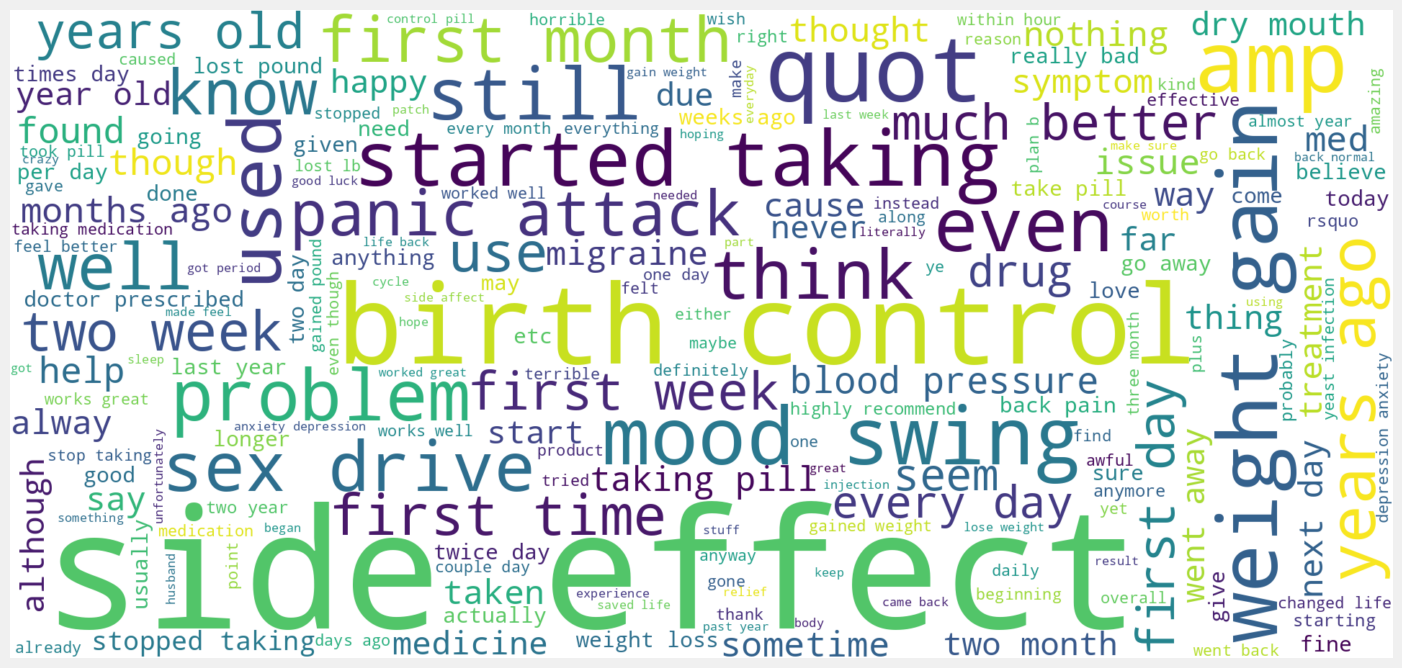

In [ ]:
text = ' '.join(df['review'].explode().dropna().tolist()) # Join all the words from the 'review' column
wordcloud = WordCloud(width=1920, height=900, background_color='white').generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**DATA PREPROCESSING**

In [ ]:
df["review"]

,review
0,"[``, side, effect, ,, take, combination, bysto..."
1,"[``, son, halfway, fourth, week, intuniv, ., b..."
2,"[``, used, take, another, oral, contraceptive,..."
3,"[``, first, time, using, form, birth, control,..."
4,"[``, suboxone, completely, turned, life, aroun..."
...,...
53761,"[``, taken, tamoxifen, 5, years, ., side, effe..."
53762,"[``, &, #, 039, ;, taking, lexapro, (, escitap..."
53763,"[``, &, #, 039, ;, married, ,, 34, years, old,..."
53764,"[``, prescribed, nucynta, severe, neck/shoulde..."


**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

pos = "I ate the food, it was spaghetti and meatballs, it was not bad, I liked it, thank you."
neg = "I am very sad and disappointed."

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

print(get_sentiment(pos))
print(get_sentiment(neg))

0.475
-0.7


In [ ]:
from textblob import TextBlob
df['review'].head()


,review
0,"[``, side, effect, ,, take, combination, bysto..."
1,"[``, son, halfway, fourth, week, intuniv, ., b..."
2,"[``, used, take, another, oral, contraceptive,..."
3,"[``, first, time, using, form, birth, control,..."
4,"[``, suboxone, completely, turned, life, aroun..."


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
df['sentiment'] = df['review'].apply(lambda x: get_sentiment(" ".join(x)))

In [ ]:
df['sentiment_label'] = df['review'].apply(lambda x: get_sentiment_label(" ".join(x)))

In [ ]:
df[['review','sentiment','sentiment_label']].head()

,review,sentiment,sentiment_label
0,"[``, side, effect, ,, take, combination, bysto...",0.000000,neutral
1,"[``, son, halfway, fourth, week, intuniv, ., b...",0.148611,positive
2,"[``, used, take, another, oral, contraceptive,...",0.119805,positive
3,"[``, first, time, using, form, birth, control,...",0.262500,positive
4,"[``, suboxone, completely, turned, life, aroun...",0.194444,positive


In [ ]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,132847
negative,70942
neutral,11274


<Axes: xlabel='sentiment_label'>

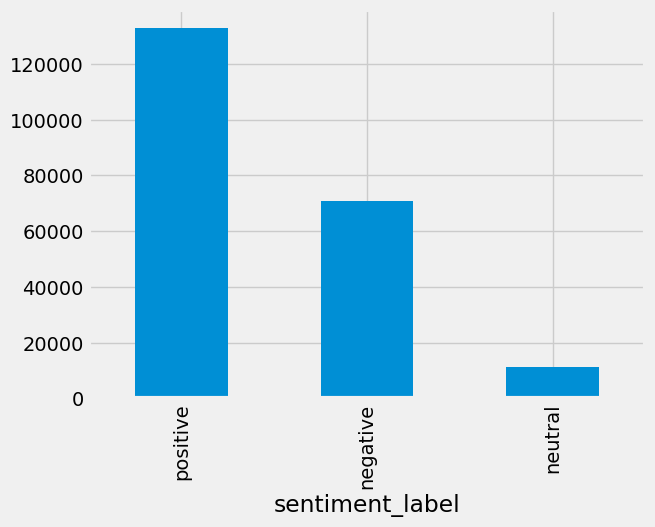

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar')

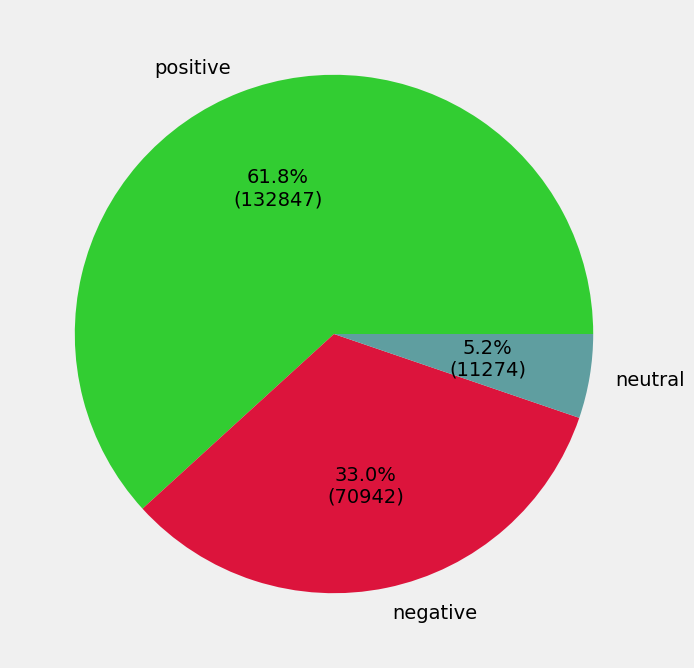

In [ ]:
plt.figure(figsize=(8,8))
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
colors = ['limegreen', 'crimson','cadetblue']
s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s), colors=colors)
plt.show()

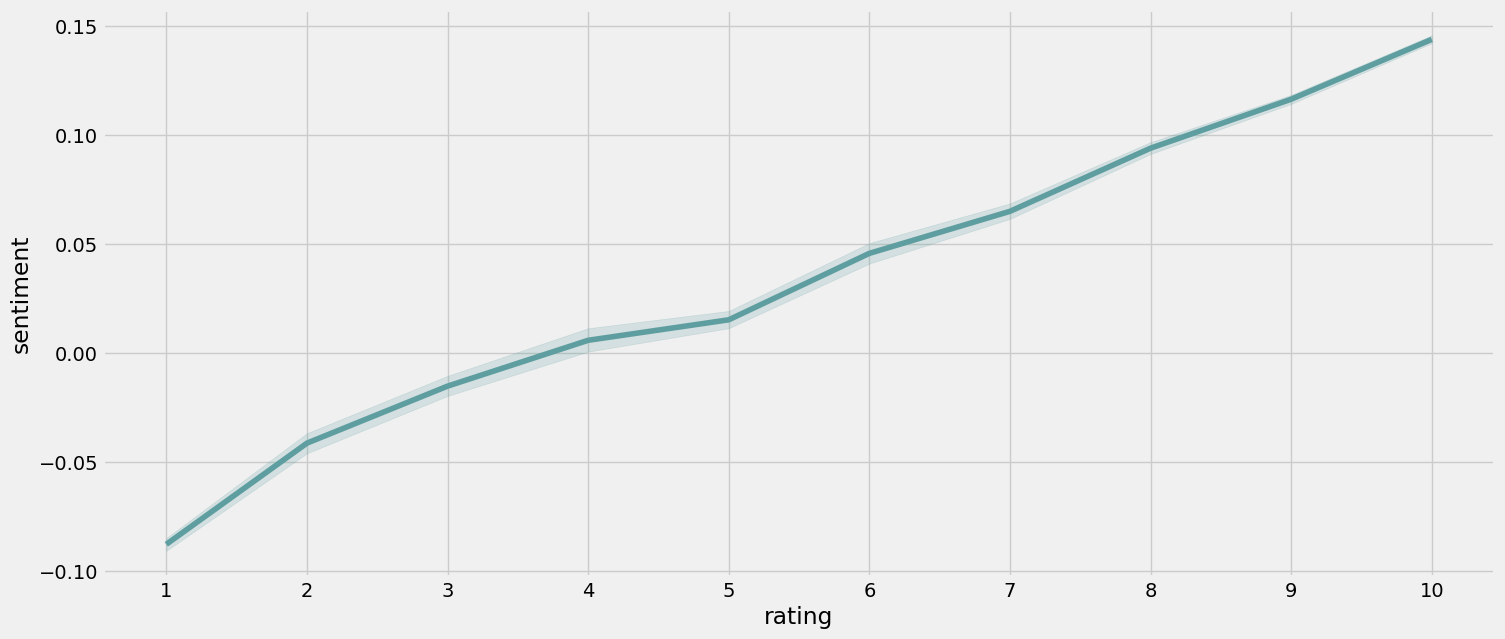

In [ ]:
plt.figure(figsize=(16, 7))
sns.lineplot(data=df, x='rating', y='sentiment', color='cadetblue')
plt.xticks(range(1, 10+1, 1))
plt.show()

We see that higher rating tends

<ipython-input-43-a9225e9375df>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


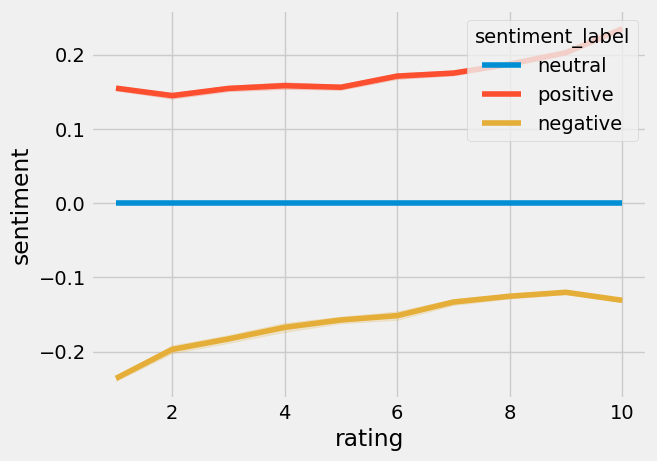

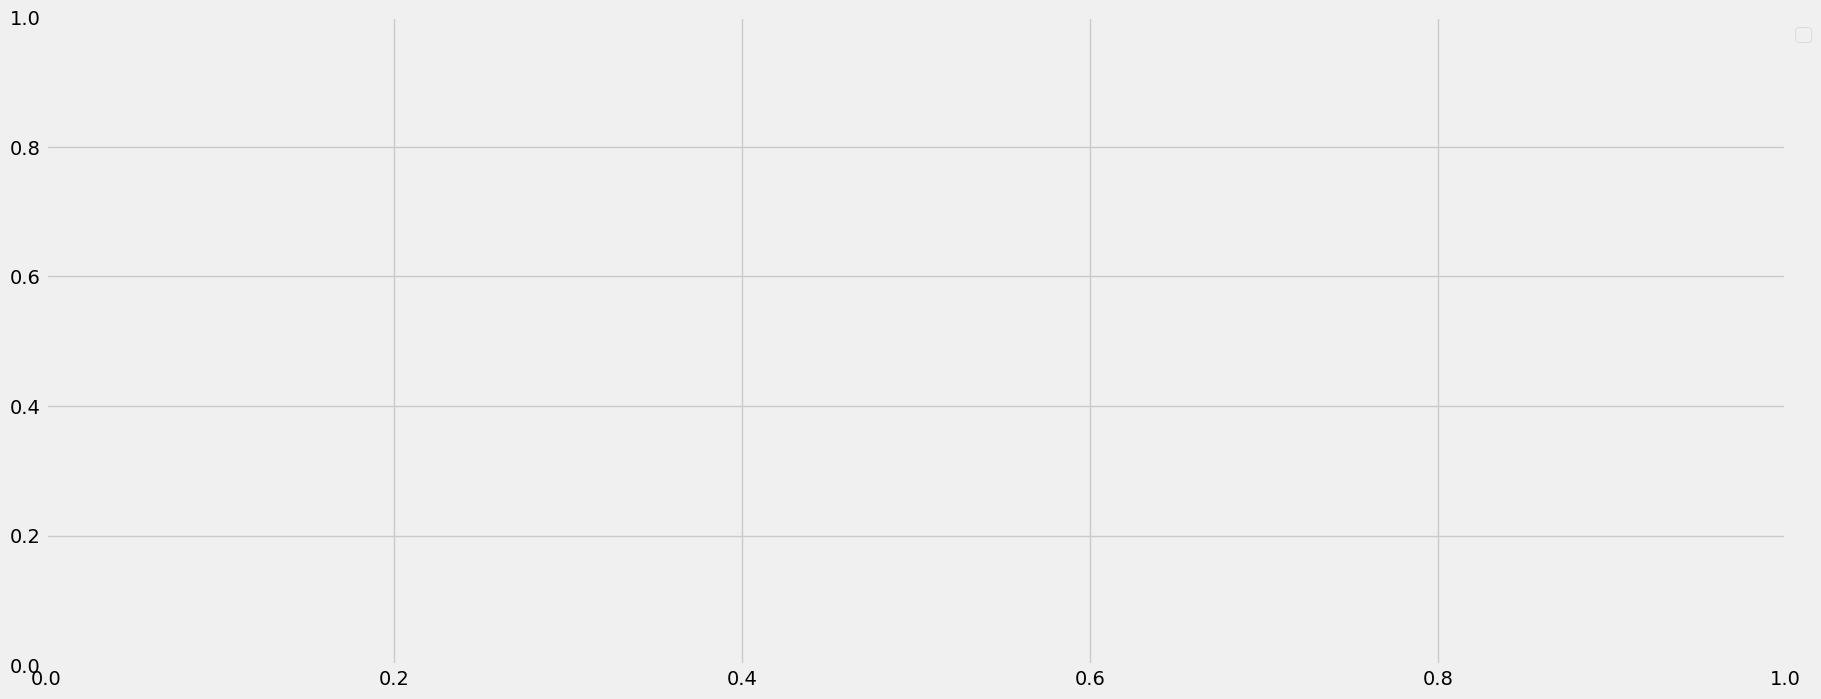

In [ ]:
# Correlation  btween rating and sentiment
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')

# Adjust legend position to the upper left corner (outside the plot)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

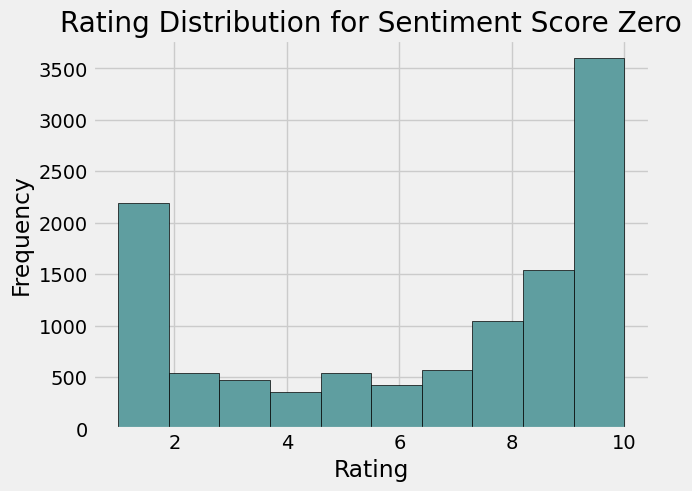

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] == 0]
plt.hist(filtered_data['rating'], bins=10, color='cadetblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Sentiment Score Zero')
plt.show()

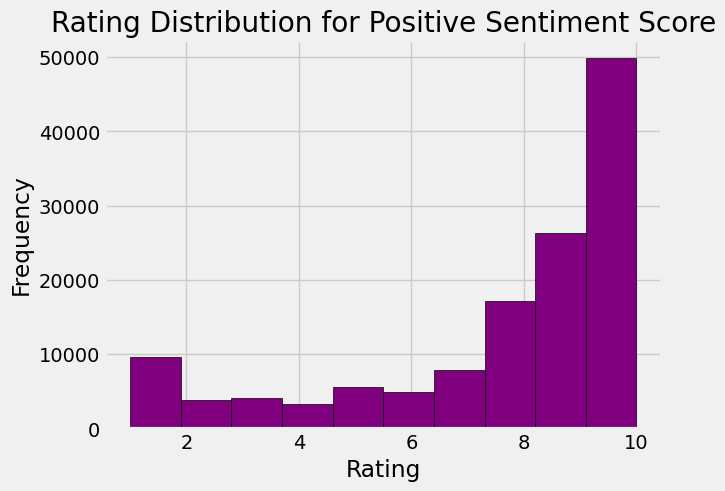

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] > 0]
plt.hist(filtered_data['rating'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Positive Sentiment Score')
plt.show()

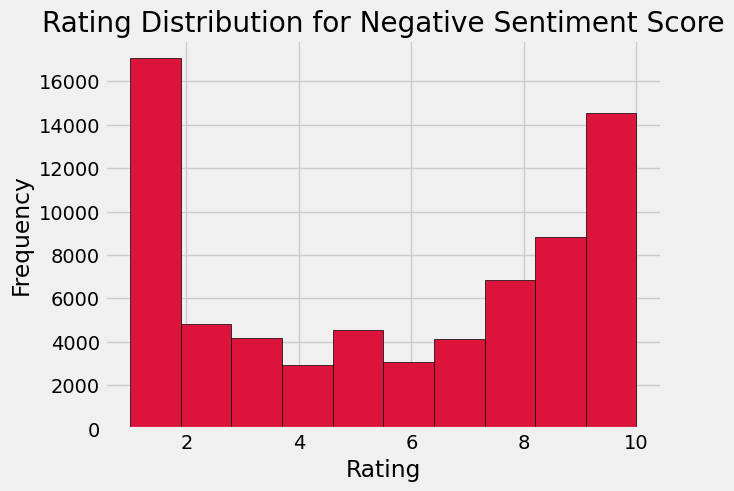

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] < 0]
plt.hist(filtered_data['rating'], bins=10, color='crimson',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Negative Sentiment Score')
plt.show()

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_label
0,Valsartan,Left Ventricular Dysfunction,"[``, side, effect, ,, take, combination, bysto...",9,20-May-12,27,0.000000,neutral
1,Guanfacine,ADHD,"[``, son, halfway, fourth, week, intuniv, ., b...",8,27-Apr-10,192,0.148611,positive
2,Lybrel,Birth Control,"[``, used, take, another, oral, contraceptive,...",5,14-Dec-09,17,0.119805,positive
3,Ortho Evra,Birth Control,"[``, first, time, using, form, birth, control,...",8,3-Nov-15,10,0.262500,positive
4,Buprenorphine / naloxone,Opiate Dependence,"[``, suboxone, completely, turned, life, aroun...",9,27-Nov-16,37,0.194444,positive


In [ ]:
new_df = df[['drugName', 'condition', 'rating', 'usefulCount', 'sentiment']]

In [ ]:
new_df.head()

,drugName,condition,rating,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,9,27,0.000000
1,Guanfacine,ADHD,8,192,0.148611
2,Lybrel,Birth Control,5,17,0.119805
3,Ortho Evra,Birth Control,8,10,0.262500
4,Buprenorphine / naloxone,Opiate Dependence,9,37,0.194444


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    215063 non-null  object 
 2   rating       215063 non-null  int64  
 3   usefulCount  215063 non-null  int64  
 4   sentiment    215063 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ MB


In [ ]:
new_df

,drugName,condition,rating,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,9,27,0.000000
1,Guanfacine,ADHD,8,192,0.148611
2,Lybrel,Birth Control,5,17,0.119805
3,Ortho Evra,Birth Control,8,10,0.262500
4,Buprenorphine / naloxone,Opiate Dependence,9,37,0.194444
...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",10,43,-0.036111
53762,Escitalopram,Anxiety,9,11,0.095358
53763,Levonorgestrel,Birth Control,8,7,-0.070022
53764,Tapentadol,Pain,1,20,0.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_df = new_df[['rating', 'usefulCount', 'sentiment']]

scaled_df = scaler.fit_transform(numerical_df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Remove the 'sparse' argument
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')  # You can use handle_unknown='ignore' to handle unseen values during prediction
drug_condition_encoded = one_hot_encoder.fit_transform(new_df[['drugName', 'condition']])
features = np.concatenate((drug_condition_encoded.toarray(), scaled_df), axis=1)  # Convert to dense array if necessary

In [ ]:
features

array([[ 0.        ,  0.        ,  0.        , ...,  0.61363567,
        -0.02754099, -0.28526613],
       [ 0.        ,  0.        ,  0.        , ...,  0.30834314,
         4.51216272,  0.33129979],
       [ 0.        ,  0.        ,  0.        , ..., -0.60753445,
        -0.30267455,  0.21178823],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.30834314,
        -0.5778081 , -0.57577576],
       [ 0.        ,  0.        ,  0.        , ..., -1.82870458,
        -0.22013448, -0.28526613],
       [ 0.        ,  0.        ,  0.        , ...,  0.61363567,
         0.49521277, -0.28526613]])

  0%|          | 0/18 [00:00<?, ?it/s]

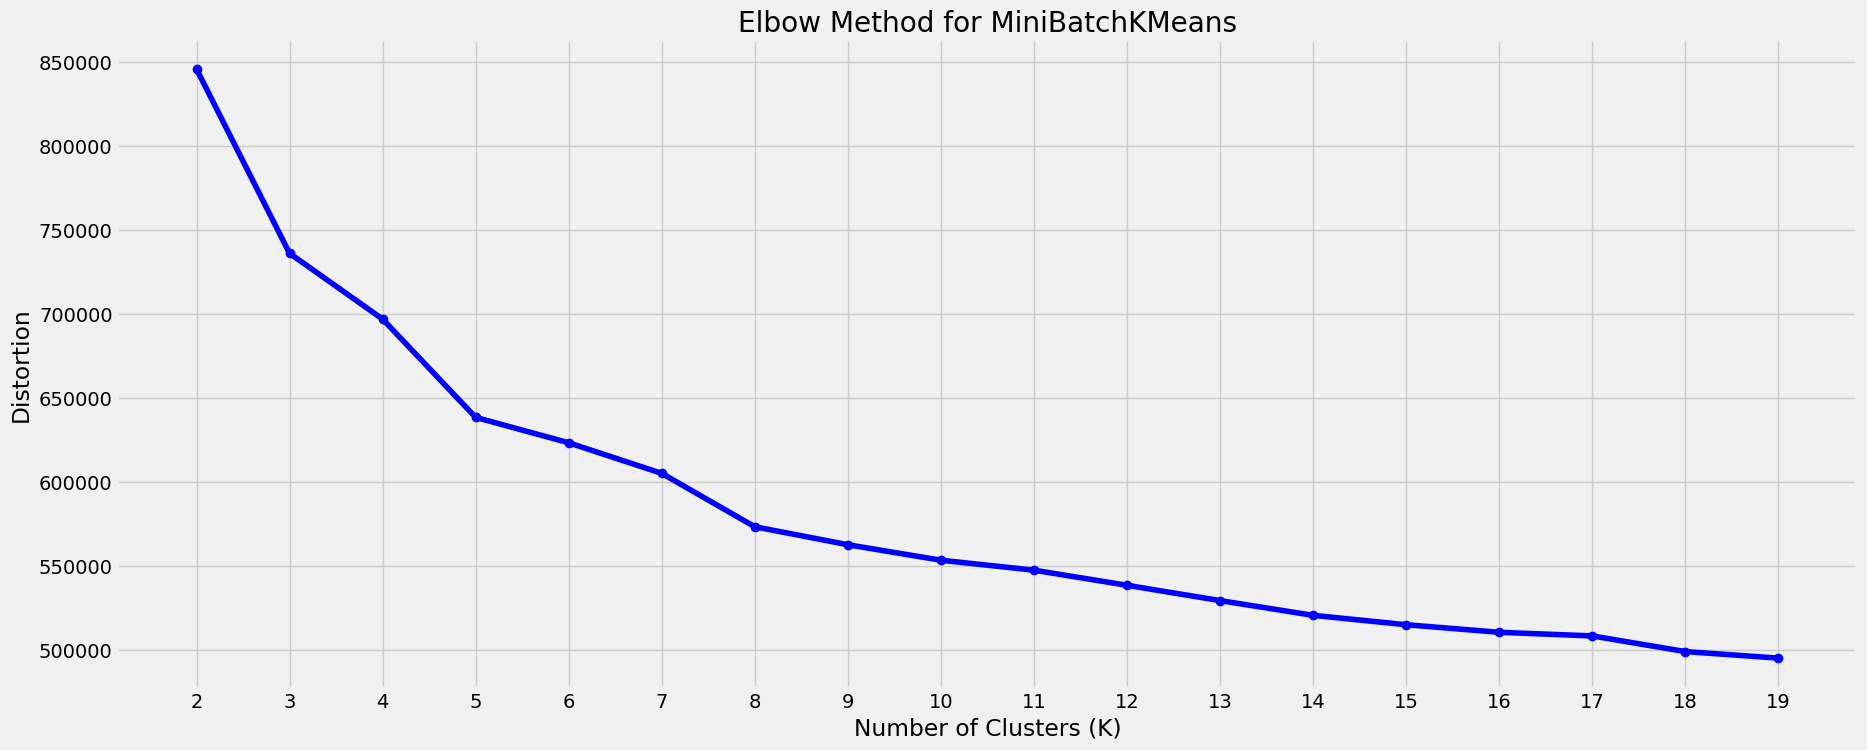

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# Define the range of K values to try
k_values = range(2, 20)
distortions = []

# Iterate over different K values
for k in tqdm(k_values):
    mbkmeans = MiniBatchKMeans(n_clusters=k, batch_size=2048, random_state=42)
    mbkmeans.fit(features)
    distortions.append(mbkmeans.inertia_)

# Plot the distortions for different K values
plt.figure(figsize=(20, 8))
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for MiniBatchKMeans')
plt.xticks(range(min(k_values), max(k_values) + 1, 1))
plt.show()

Best K value (Elbow Point): 8


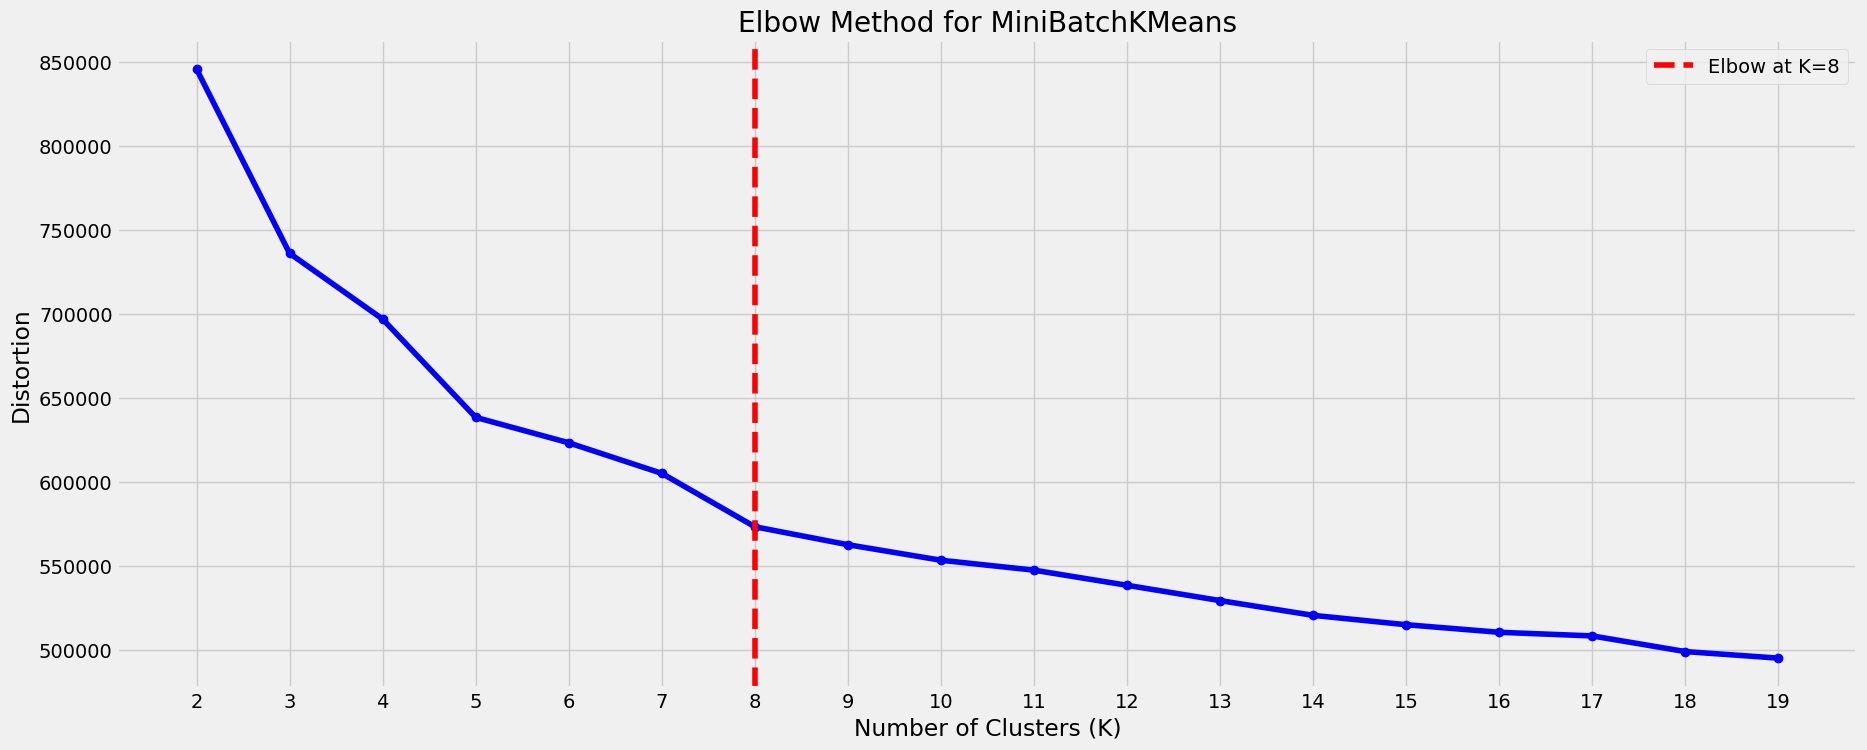

In [ ]:
!pip install kneed
from kneed import KneeLocator

# Find the elbow point
knee_locator = KneeLocator(k_values, distortions, curve="convex", direction="decreasing")
best_k = knee_locator.knee

print(f"Best K value (Elbow Point): {best_k}")

# Plot with the elbow point
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for MiniBatchKMeans')
plt.xticks(range(min(k_values), max(k_values) + 1, 1))

# Highlight the best K
if best_k:
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Elbow at K={best_k}')
    plt.legend()

plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.cluster import MiniBatchKMeans

k = 5  # Number of clusters
mbkmeans = MiniBatchKMeans(n_clusters=k, batch_size=4096)
mbkmeans.fit(features)

# Predict the clusters for each data point
cluster_labels = mbkmeans.predict(features)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
random_indices = np.random.choice(features.shape[0], 3000, replace=False)
random_data = features[random_indices]
random_labels = cluster_labels[random_indices]

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(random_data)

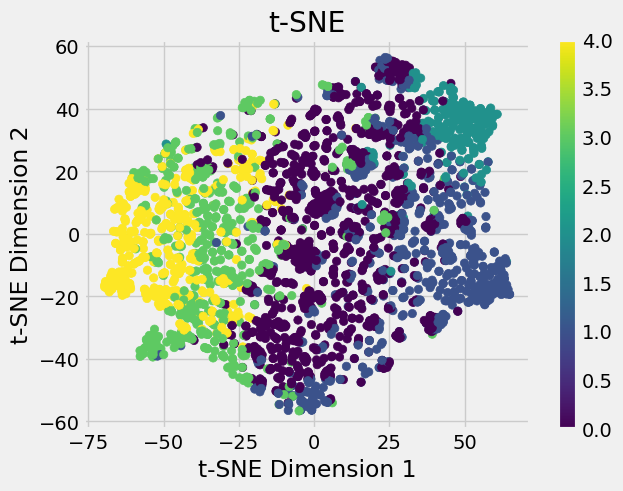

In [ ]:
#plt.figure(figsize=(16, 7))
scatter=plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=random_labels)
#plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE')
plt.colorbar()
plt.show()

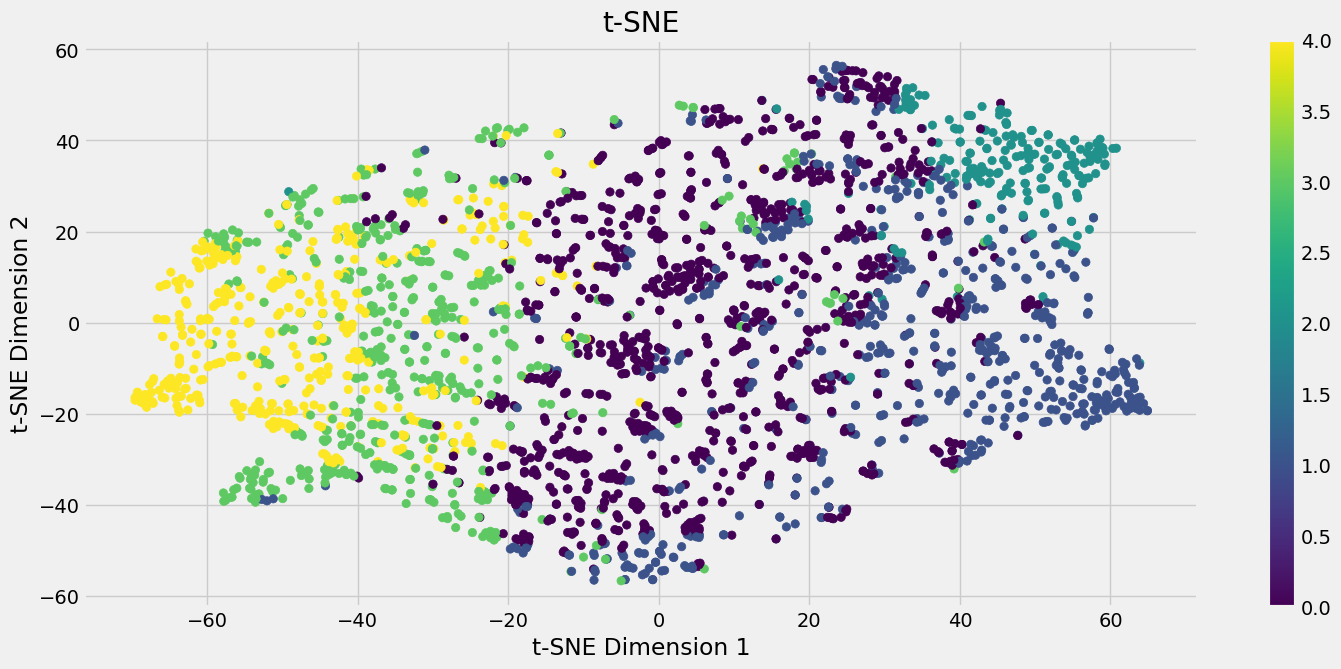

In [ ]:
plt.figure(figsize=(16, 7))
scatter=plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=random_labels)
#plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(random_data)

In [ ]:
centroids_pca = pca.transform(mbkmeans.cluster_centers_)

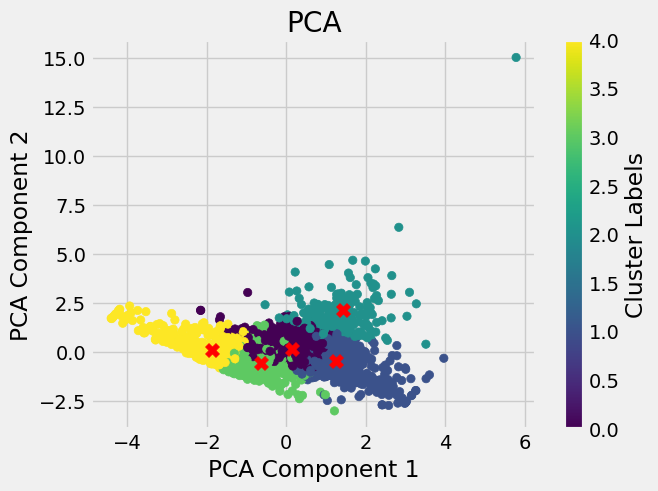

In [ ]:
#plt.figure(figsize=(16, 7))
scatter=plt.scatter(pca_data[:, 0], pca_data[:, 1], c=random_labels)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA')
plt.colorbar(scatter, label="Cluster Labels")
plt.show()

In [ ]:
pip install umap-learn

In [ ]:
import umap

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


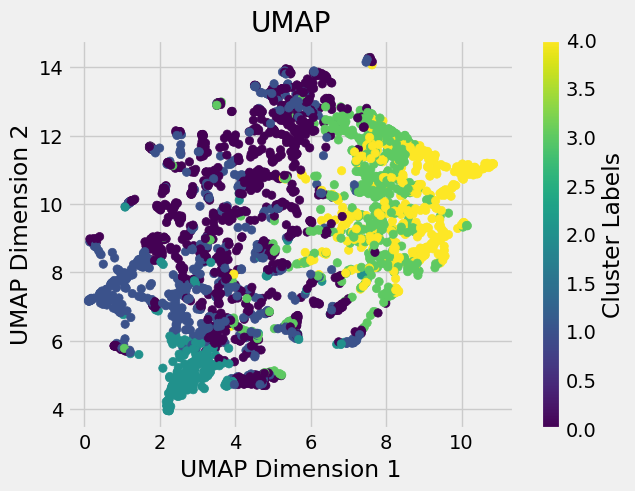

In [ ]:
import matplotlib.pyplot as plt

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data (assuming 'preprocessed_data' is your dataset)
umap_data = umap_model.fit_transform(random_data)

# Scatter plot of UMAP results
#plt.figure(figsize=(20, 8))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=random_labels)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP')
plt.colorbar(label="Cluster Labels")
plt.show()